In [1]:
import pandas as pd
import numpy as np

In [2]:



    
names1948=pd.read_table('movies/yob1948.txt',sep=',',names=['name','gender','births'])



In [3]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']
for year in years:
    path='movies/yob%d.txt'%year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)

In [4]:
names=pd.concat(pieces,ignore_index=True)

In [5]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [81]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

<AxesSubplot:title={'center':'total births by gender'}, xlabel='year'>

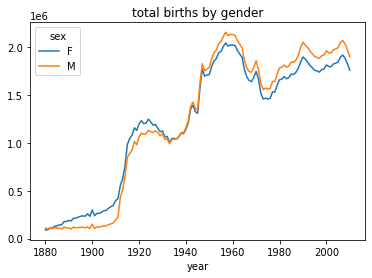

In [83]:
total_births.plot(title="total births by gender")

In [6]:
prop_table=names.groupby(['year','name']).sum()

sumperyear=names.groupby(['year']).sum()

# for (year,name) in prop_table.index:
#     if year in sumperyear.index:
#         prop_table['sum_per_year']=sumperyear.loc[1880]

In [35]:

def add_prop(g):
    g['prop']=g.births/g.births.sum()
    return g




In [36]:
names=names.groupby(['year','sex']).apply(add_prop)

In [37]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [22]:
def top1000(g):
    return g.sort_values(by='births',ascending=False)[:1000]



In [24]:
t1000=names.groupby(['year','sex']).apply(top1000)


In [54]:
t1000.head()
t1000. drop('year', axis=1, inplace=True) 
t1000

name sex  births      prop
year sex                                         
1880 F   0             Mary   F    7065  0.077643
         1             Anna   F    2604  0.028618
         2             Emma   F    2003  0.022013
         3        Elizabeth   F    1939  0.021309
         4           Minnie   F    1746  0.019188
...                     ...  ..     ...       ...
2010 M   1677639     Camilo   M     194  0.000102
         1677640     Destin   M     194  0.000102
         1677641     Jaquan   M     194  0.000102
         1677642     Jaydan   M     194  0.000102
         1677645     Maxton   M     193  0.000102

[261877 rows x 4 columns]

In [28]:
boys=t1000[t1000.sex=='M']
girls=t1000[t1000.sex=='F']

In [56]:
total_births = t1000.pivot_table('births', index='year',
 .....: columns='name',
 .....: aggfunc=sum)


In [58]:
total_births.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

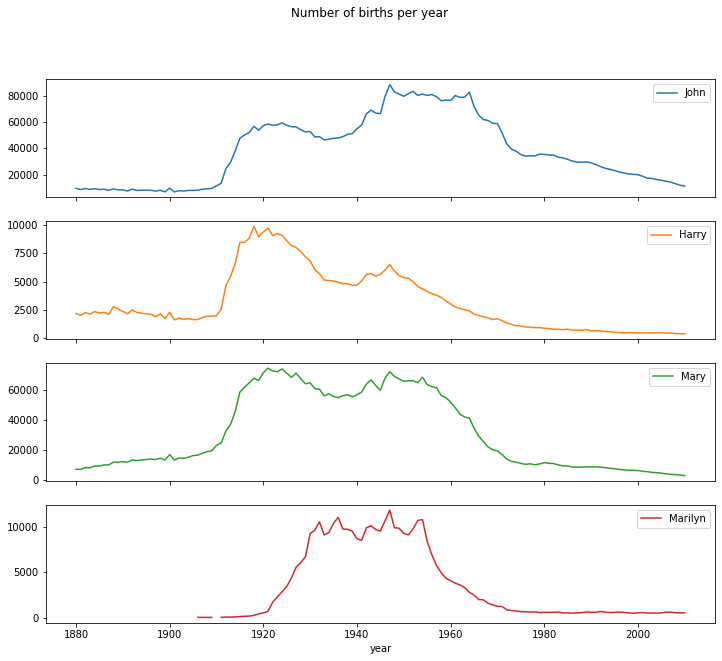

In [60]:
subset=total_births[['John','Harry','Mary','Marilyn'
                    ]]
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

In [63]:
t1000

name sex  births      prop
year sex                                         
1880 F   0             Mary   F    7065  0.077643
         1             Anna   F    2604  0.028618
         2             Emma   F    2003  0.022013
         3        Elizabeth   F    1939  0.021309
         4           Minnie   F    1746  0.019188
...                     ...  ..     ...       ...
2010 M   1677639     Camilo   M     194  0.000102
         1677640     Destin   M     194  0.000102
         1677641     Jaquan   M     194  0.000102
         1677642     Jaydan   M     194  0.000102
         1677645     Maxton   M     193  0.000102

[261877 rows x 4 columns]

In [69]:
t1000=t1000.drop('sex',axis=1,inplace=False)

In [70]:
t1000

name  births      prop
year sex                                     
1880 F   0             Mary    7065  0.077643
         1             Anna    2604  0.028618
         2             Emma    2003  0.022013
         3        Elizabeth    1939  0.021309
         4           Minnie    1746  0.019188
...                     ...     ...       ...
2010 M   1677639     Camilo     194  0.000102
         1677640     Destin     194  0.000102
         1677641     Jaquan     194  0.000102
         1677642     Jaydan     194  0.000102
         1677645     Maxton     193  0.000102

[261877 rows x 3 columns]

In [71]:
table=t1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

In [73]:
table.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


<AxesSubplot:title={'center':'sum of t1000.prop by year and sex'}, xlabel='year'>

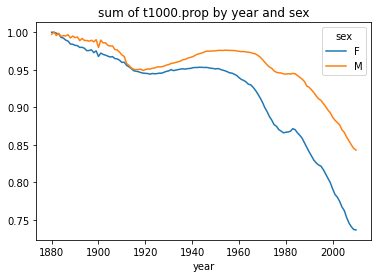

In [74]:
table.plot(title="sum of t1000.prop by year and sex")

In [78]:
df=boys[boys.year==2010].sort_values(by='prop',ascending=False)

In [80]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()

In [82]:
prop_cumsum.values.searchsorted(0.5)

116